In [24]:
import pandas as pd
import sqlite3 as sql

In [25]:
# create df
election_df = pd.read_csv('elections.csv')

# create db
conn = sql.connect('elections.db')

In [26]:
election_df.head(4)


,ons_id,result,first_party,second_party,electorate,valid_votes,invalid_votes,majority,con,lab,...,green,snp,pc,dup,sf,sdlp,uup,alliance,other,other_winner
0,W07000049,Lab hold,Lab,Con,50750,31598,82,10490,6518,17008,...,450,0,2711,0,0,0,0,0,731,0
1,W07000058,Con hold,Con,Lab,44699,31865,123,2034,14687,12653,...,0,0,2704,0,0,0,0,0,0,0
2,S14000001,SNP hold,SNP,Con,62489,37413,72,12670,7535,4939,...,880,20205,0,0,0,0,0,0,0,0
3,S14000002,SNP gain from Con,SNP,Con,65719,45638,131,3990,16398,3834,...,0,20388,0,0,0,0,0,0,0,0


In [4]:
# Select all from database
query = "SELECT * FROM elections"
cur = conn.execute(query)
rows = cur.fetchall()
print(rows[0:4])

[(0, 'W07000049', 'Lab hold', 'Lab', 'Con', 50750, 31598, 82, 10490, 6518, 17008, 1072, 3108, 450, 0, 2711, 0, 0, 0, 0, 0, 731, 0), (1, 'W07000058', 'Con hold', 'Con', 'Lab', 44699, 31865, 123, 2034, 14687, 12653, 1821, 0, 0, 0, 2704, 0, 0, 0, 0, 0, 0, 0), (2, 'S14000001', 'SNP hold', 'SNP', 'Con', 62489, 37413, 72, 12670, 7535, 4939, 2846, 1008, 880, 20205, 0, 0, 0, 0, 0, 0, 0, 0), (3, 'S14000002', 'SNP gain from Con', 'SNP', 'Con', 65719, 45638, 131, 3990, 16398, 3834, 5018, 0, 0, 20388, 0, 0, 0, 0, 0, 0, 0, 0)]


In [5]:
query = """
    SELECT first_party 
    FROM elections
"""
cur = conn.execute(query)
rows = cur.fetchall()
print(rows[0:4])

[('Lab',), ('Con',), ('SNP',), ('SNP',)]


In [6]:
election_df['first_party'][0:4]

0    Lab
1    Con
2    SNP
3    SNP
Name: first_party, dtype: object

In [7]:
query = """
    SELECT DISTINCT first_party 
    FROM elections
"""
cur = conn.execute(query)
rows = cur.fetchall()
partiesdb = rows
partiesdb


[('Lab',),
 ('Con',),
 ('SNP',),
 ('PC',),
 ('LD',),
 ('DUP',),
 ('SF',),
 ('SDLP',),
 ('Green',),
 ('Spk',),
 ('Alliance',)]

In [8]:
partiesdf = election_df['first_party'].unique()
partiesdf

array(['Lab', 'Con', 'SNP', 'PC', 'LD', 'DUP', 'SF', 'SDLP', 'Green',
       'Spk', 'Alliance'], dtype=object)

In [9]:
query = """
    SELECT first_party 
    FROM elections
    WHERE first_party == 'Lab'
"""
cur = conn.execute(query)
rows = cur.fetchall()
labWinsdb=len(rows)
labWinsdb



202

In [10]:
labWinsdf = len(election_df[election_df['first_party'] == 'Lab'])
labWinsdf

202

In [11]:
election_df['first_party'] == 'Lab'

0       True
1      False
2      False
3      False
4      False
       ...  
645     True
646    False
647    False
648     True
649    False
Name: first_party, Length: 650, dtype: bool

In [12]:
partyWinsdb = []
for i in partiesdb:
    query = f"""
        SELECT * 
        FROM elections
        WHERE first_party = '{i[0]}'
    """
    cur = conn.execute(query)
    rows = cur.fetchall()
    partyWinsdb.append(len(rows))
    print(len(rows))

print(partiesdb)
partyWinsdb
    

202
365
48
4
11
8
7
2
1
1
1
[('Lab',), ('Con',), ('SNP',), ('PC',), ('LD',), ('DUP',), ('SF',), ('SDLP',), ('Green',), ('Spk',), ('Alliance',)]


[202, 365, 48, 4, 11, 8, 7, 2, 1, 1, 1]

In [13]:
def getWins(i):
    query = f"""
        SELECT * 
        FROM elections
        WHERE first_party = '{i[0]}'
    """
    cur = conn.execute(query)
    rows = cur.fetchall()
    return(len(rows))

partyWinsdb = [ getWins(i) for i in partiesdb]
    

print(partiesdb)
partyWinsdb

[('Lab',), ('Con',), ('SNP',), ('PC',), ('LD',), ('DUP',), ('SF',), ('SDLP',), ('Green',), ('Spk',), ('Alliance',)]


[202, 365, 48, 4, 11, 8, 7, 2, 1, 1, 1]

In [14]:
partyWinsdf = []

for i in partiesdf:
    partyWinsdf.append(len(election_df[election_df['first_party']==i]))
print(partiesdf)
partyWinsdf
    


['Lab' 'Con' 'SNP' 'PC' 'LD' 'DUP' 'SF' 'SDLP' 'Green' 'Spk' 'Alliance']


[202, 365, 48, 4, 11, 8, 7, 2, 1, 1, 1]

In [15]:
partyWinsdf = [len(election_df[election_df['first_party']==i]) for i in partiesdf]
print(partiesdf)
partyWinsdf

['Lab' 'Con' 'SNP' 'PC' 'LD' 'DUP' 'SF' 'SDLP' 'Green' 'Spk' 'Alliance']


[202, 365, 48, 4, 11, 8, 7, 2, 1, 1, 1]

In [16]:
partiesdf

array(['Lab', 'Con', 'SNP', 'PC', 'LD', 'DUP', 'SF', 'SDLP', 'Green',
       'Spk', 'Alliance'], dtype=object)

<AxesSubplot:>

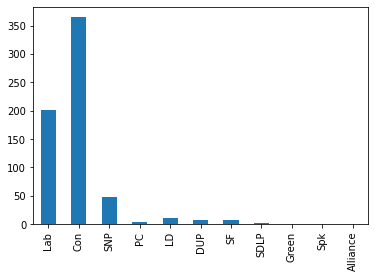

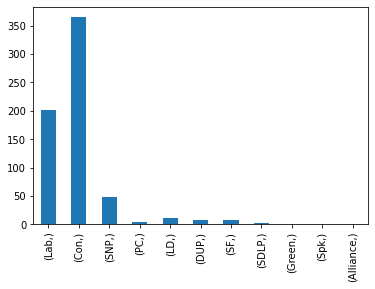

In [17]:
dfdf = pd.DataFrame(partyWinsdf,partiesdf)
dfdf.plot.bar(legend=False)
dfdb = pd.DataFrame(partyWinsdb,partiesdb)
dfdb.plot.bar(legend=False)

In [18]:
election_df.columns

Index(['Unnamed: 0', 'ons_id', 'result', 'first_party', 'second_party',
       'electorate', 'valid_votes', 'invalid_votes', 'majority', 'con', 'lab',
       'ld', 'brexit', 'green', 'snp', 'pc', 'dup', 'sf', 'sdlp', 'uup',
       'alliance', 'other', 'other_winner'],
      dtype='object')

In [19]:
parties = list(partiesdf)
parties.remove('Spk')
seats = list(partyWinsdf)[:-1]
#seats.remove('Spk')
print(seats)

total_votes=election_df['valid_votes'].sum()

print(total_votes)
total_votes_party = [election_df[i.lower()].sum(axis=0) for i in parties]
total_votes_party

[202, 365, 48, 4, 11, 8, 7, 2, 1, 1]
32014110


[10269051,
 13966454,
 1242380,
 153265,
 3696419,
 244128,
 181853,
 118737,
 865715,
 134115]

,parties,percentage_votes,percentage_seats
0,Lab,32.076641,31.076923
1,Con,43.625932,56.153846
2,SNP,3.880726,7.384615
3,PC,0.478742,0.615385
4,LD,11.546218,1.692308
5,DUP,0.762564,1.230769
6,SF,0.568040,1.076923
7,SDLP,0.370890,0.307692
8,Green,2.704167,0.153846
9,Alliance,0.418925,0.153846


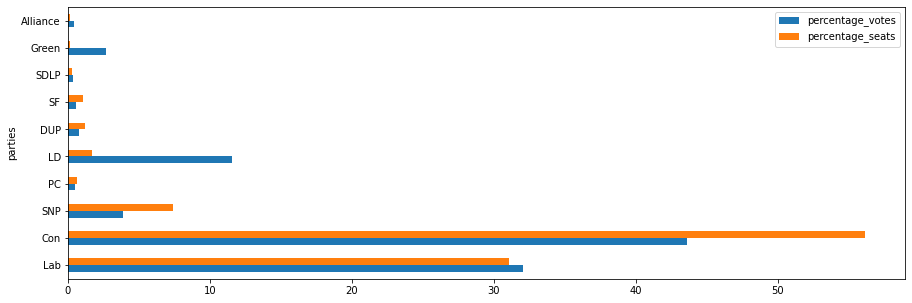

In [20]:
share = [ total_votes_party[i]/total_votes*100 for i in range(0,len(total_votes_party))]

sharedf = pd.DataFrame()
sharedf['parties'] = parties
sharedf['percentage_votes'] = total_votes_party
sharedf['percentage_votes']=sharedf['percentage_votes']/total_votes*100
sharedf['percentage_seats'] = seats
sharedf['percentage_seats']=sharedf['percentage_seats']/650*100

sharedf.plot.barh(x='parties',figsize=(15,5))


sharedf